In [57]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [77]:
dir="C:/Users/Expedition/Desktop/expedition2025summer/"

In [ ]:
#data = ert.load(dir + '11Aug/nuna_a32_transect_long.dat')
#data.save(dir + '11Aug/nuna_a32_transect_long.txt', "a b m n err rhoa")

13/08/25 - 18:58:21 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [118]:
data = ert.load(dir + '11Aug/nuna_a32_transect_long.txt')

In [119]:
data['err'] = data['err']/100 + 0.02

In [ ]:
#data['err'] = data['iperr']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1d9e9015bd0>)

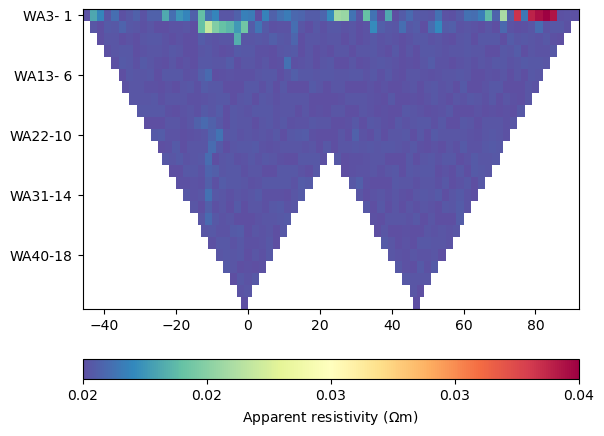

In [120]:
ert.showData(data,data['err'])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1d9e99789d0>)

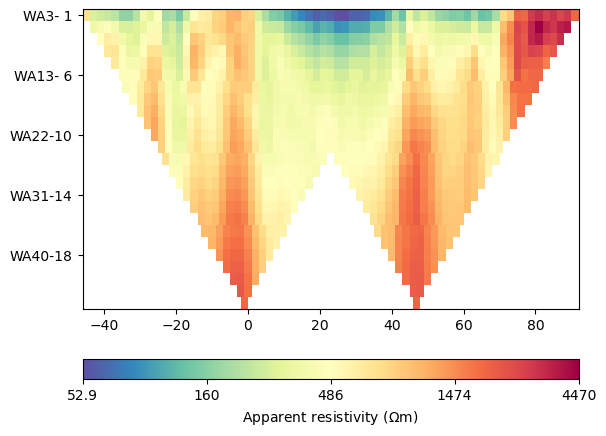

In [121]:
ert.showData(data)

In [122]:
data["k"] = ert.createGeometricFactors(data)

13/08/25 - 20:56:56 - pyGIMLi - INFO - Cache c:\Users\Expedition\miniconda3\envs\pgdev\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\5968144446102645624


13/08/25 - 20:57:12 - pyGIMLi - INFO - Found 2 regions.
13/08/25 - 20:57:12 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/08/25 - 20:57:12 - pyGIMLi - INFO - Found 2 regions.
13/08/25 - 20:57:12 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/08/25 - 20:57:12 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/08/25 - 20:57:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/08/25 - 20:57:13 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 32142 Cells: 63756 Boundaries: 48080
13/08/25 - 20:57:14 - pyGIMLi - INFO - Use median(data values)=616.0
13/08/25 - 20:57:14 - pyGIMLi - INFO - Created startmodel from forward operator:14347, min/max=616.000000/616.000000
13/08/25 - 20:57:14 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001DA6722D850>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 52.9/4470
min/max (error): 2%/3.99%
min/max (start model): 616/616
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1256.42
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  136.48 (dPhi = 89.06%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   60.38 (dPhi = 55.46%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    4.33 (dPhi = 91.04%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    0.91 (dPhi = 63.16%) lam: 30.

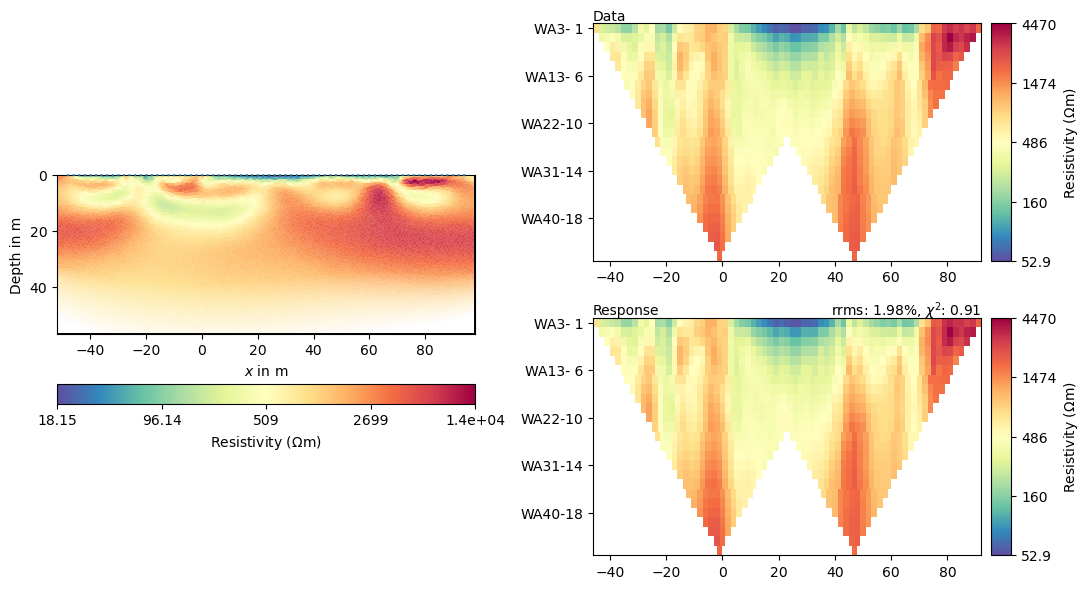

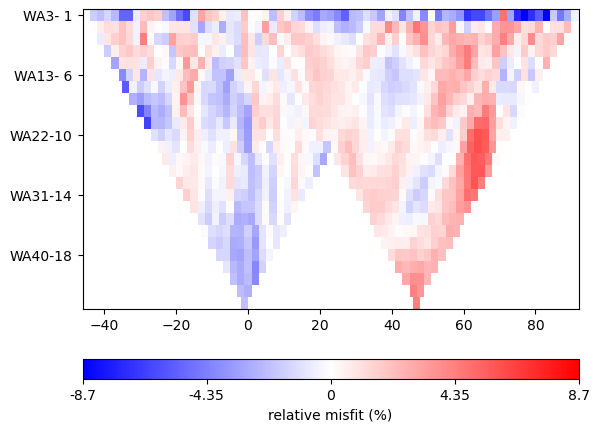

In [123]:
mgr = ert.ERTManager(data)
mgr.invert(data, verbose=True, paraDX = 0.25, zWeight=0.2, paraDZ= 0.25, lam=30, paraMaxCellSize=1)
mgr.showResultAndFit()
mgr.showMisfit()

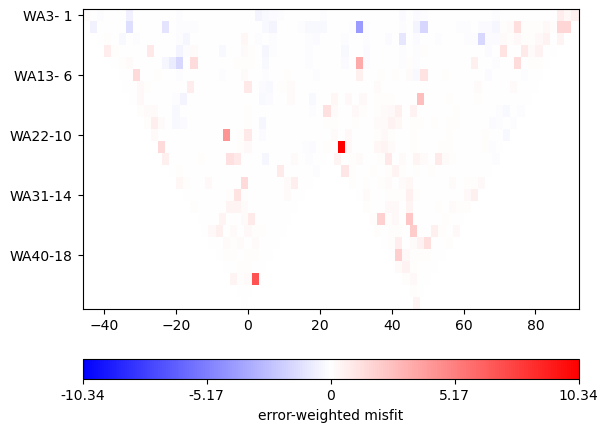

In [116]:
mgr.showMisfit(errorWeighted=True)

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x1d9e603f310>)

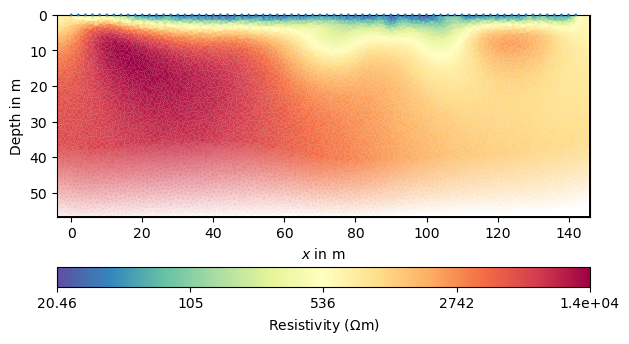

In [56]:
mgr.showResult()

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x1da0dc2c290>)

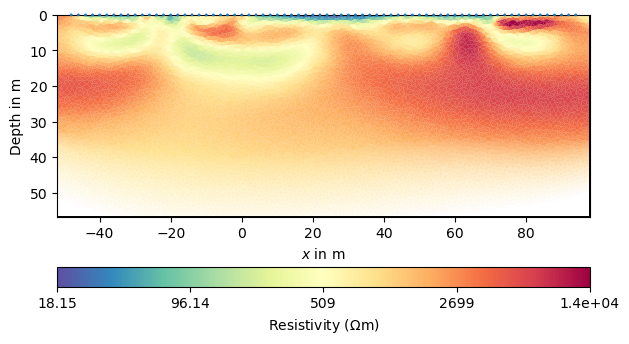

In [129]:
mgr.showResult()